In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
sys.path.insert(0,os.path.dirname(os.getcwd()))
import effMap as ef

In [3]:
data = pd.read_csv('..\\Data\\test_data.csv')
data.dropna(subset=['Forward Speed', 'Reverse Speed', 'Volumetric at 1780RPM'], inplace=True)
speeds = data[['Forward Speed', 'Reverse Speed']].astype(float)
speeds = speeds.stack()
vol_eff = speeds / 1780 * 1e2

2020-09-21 08:59:31.889 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-09-21 08:59:31.889 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [4]:
piston_max = 1.1653 * 25.4 * 1e-3
piston_min = 1.1650 * 25.4 * 1e-3
bore_max = 1.1677 * 25.4 * 1e-3
bore_min = 1.1671 * 25.4 * 1e-3
rad_clearance_max = (bore_max - piston_min) / 2
rad_clearance_min = (bore_min - piston_max) / 2

In [5]:
benchmark = ef.HST(disp=196,swash=15,oil='SAE 30', oil_temp=60)
benchmark.compute_sizes(k1=.7155, k2=.9017, k3=.47, k4=.9348, k5=.9068)
eff_min = benchmark.compute_eff(speed_pump=1780, pressure_discharge=207, pressure_charge=14,h3=rad_clearance_max)
eff_max = benchmark.compute_eff(speed_pump=1780, pressure_discharge=207, pressure_charge=14,h3=rad_clearance_min)

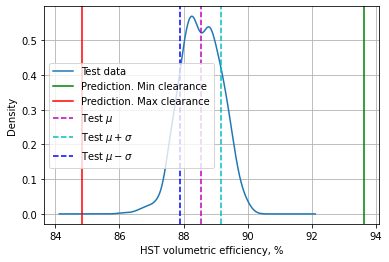

In [6]:
vol_eff.plot(kind='kde',grid=True,label='Test data')
plt.axvline(eff_max['hst']['volumetric'],linestyle='-',label='Prediction. Min clearance',color='g')
plt.axvline(eff_min['hst']['volumetric'],linestyle='-',label='Prediction. Max clearance',color='r')
plt.axvline(vol_eff.mean(),linestyle='--',label='Test $\mu$',color='m')
plt.axvline(vol_eff.mean()+vol_eff.std(),linestyle='--',label='Test $\mu + \sigma$',color='c')
plt.axvline(vol_eff.mean()-vol_eff.std(),linestyle='--',label='Test $\mu - \sigma$',color='b')
plt.xlabel('HST volumetric efficiency, %')
# plt.ylim(0, 100)
plt.legend()

<AxesSubplot:>

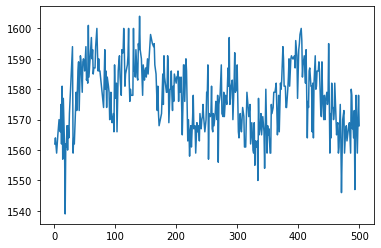

In [7]:
data['Reverse Speed'].astype(float).plot()

<AxesSubplot:>

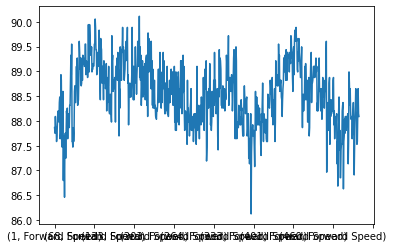

In [8]:
vol_eff.plot()

In [31]:
dir(vol_eff)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__